In [1]:
import numpy as np
import matplotlib.pyplot as plt

from bandit import Bandit, Agent

<h5> 1000번 플레이

819


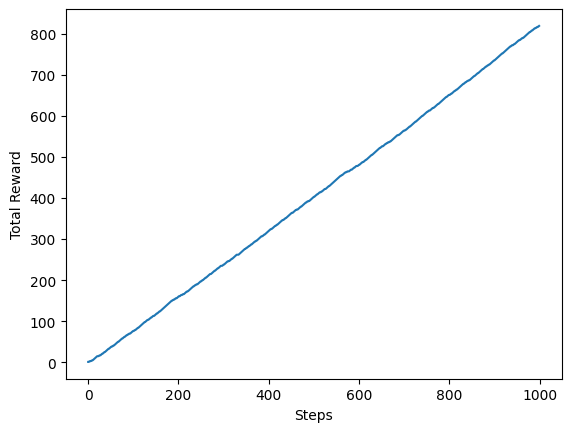

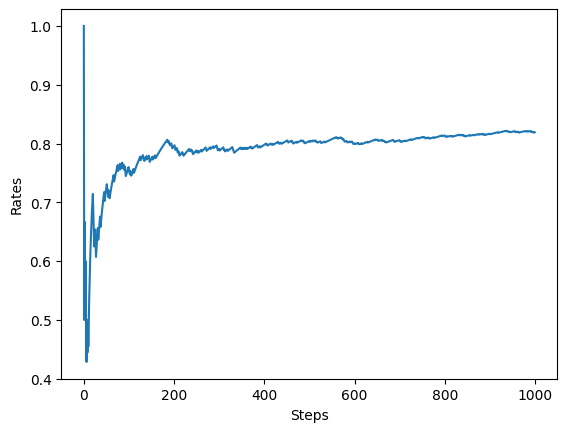

In [2]:
steps = 1000
epsilon = 0.1

bandit = Bandit()
agent = Agent(epsilon)

total_reward = 0
total_rewards = []
rates = []

for step in range(steps):
    action = agent.get_action()
    reward = bandit.play(action)
    agent.update(action, reward)
    total_reward += reward
    total_rewards.append(total_reward)
    rates.append(total_reward / (step + 1))
    
print(total_reward)
# 그래프 그리기: 단계별 승률
plt.ylabel("Total Reward")
plt.xlabel("Steps")
plt.plot(total_rewards)
plt.show()

# 그래프 그리기: 단계별 승률
plt.ylabel("Rates")
plt.xlabel("Steps")
plt.plot(rates)
plt.show()

<h5> 1000번 플레이하는 실험을 10번 반복

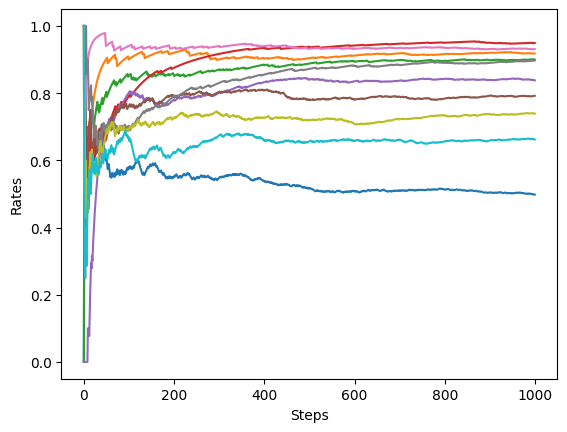

In [3]:
steps = 1000
epsilon = 0.1

rates_list = []

for i in range(10):
    bandit = Bandit()
    agent = Agent(epsilon)
    
    total_reward = 0
    rates = [] # 승률
    for step in range(steps):
        action = agent.get_action()  # 행동 선택
        reward = bandit.play(action) # 실제로 플레이하고 보상을 받음
        agent.update(action, reward) # 행동과 보상을 통해 학습
        total_reward += reward
        rates.append(total_reward / (step + 1))          # 현재까지의 승률 저장
    
    rates_list.append(rates)
    

# 그래프 그리기: 단계별 승률
plt.ylabel("Rates")
plt.xlabel("Steps")
for i in range(10):
    plt.plot(rates_list[i])
plt.show()

<h5> 같은 실험을 200번 반복하여 평균 승률 구하기

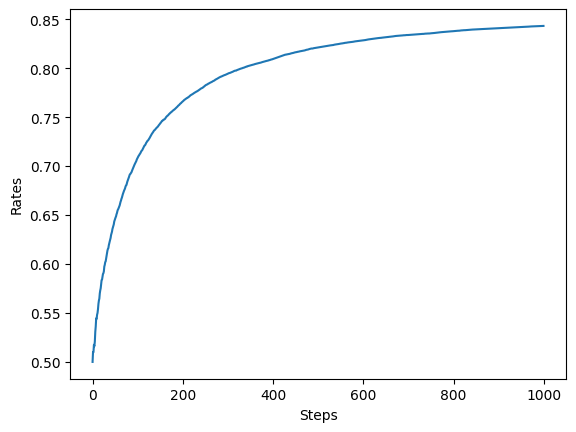

In [4]:
runs = 200
steps = 1000
epsilon = 0.1
all_rates = np.zeros((runs, steps)) # (200, 1000)

for run in range(runs):
    bandit = Bandit()
    agent = Agent(epsilon)
    total_reward = 0
    rates = []
    
    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step + 1))
    
    all_rates[run] = rates

avg_rates = np.average(all_rates, axis=0) # 각 단계의 평균 저장

# 그래프 그리기: 단계별 승률(200번 실험 후 평균)
plt.ylabel("Rates")
plt.xlabel("Steps")
plt.plot(avg_rates)
plt.show()

##### $\varepsilon$을 다르게 하여 실험

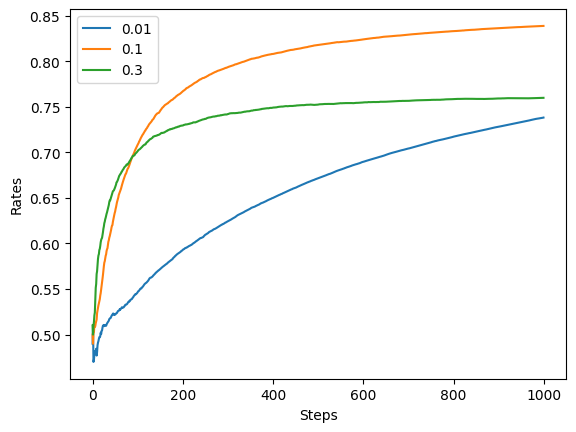

In [5]:
runs = 200
steps = 1000

avg_rates_list = []

for epsilon in [0.01, 0.1, 0.3]:
    all_rates = np.zeros((runs, steps)) # (200, 1000)
    
    for run in range(runs):
        bandit = Bandit()
        agent = Agent(epsilon)
        total_reward = 0
        rates = []
        
        for step in range(steps):
            action = agent.get_action()
            reward = bandit.play(action)
            agent.update(action, reward)
            total_reward += reward
            rates.append(total_reward / (step + 1))
        
        all_rates[run] = rates

    avg_rates = np.average(all_rates, axis=0) # 각 단계의 평균 저장
    avg_rates_list.append(avg_rates)

# 그래프 그리기: 단계별 승률(200번 실험 후 평균)
plt.ylabel("Rates")
plt.xlabel("Steps")
for i, epsilon in enumerate([0.01, 0.1, 0.3]):
    plt.plot(avg_rates_list[i], label=epsilon)
plt.legend()
plt.show()
    

##### 비정상 문제 풀기

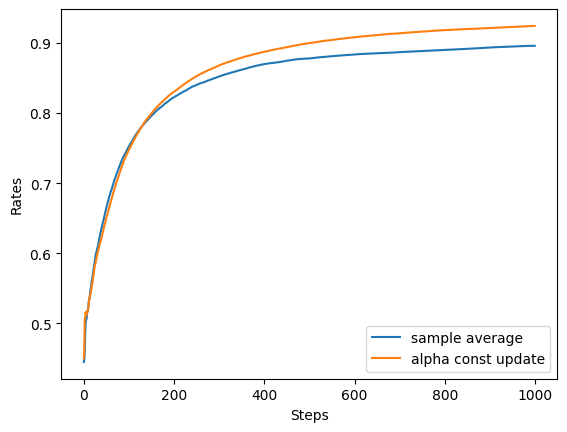

In [9]:
from non_stationary import NonStatBandit, AlphaAgent

runs = 200
steps = 1000
epsilon = 0.1
alpha = 0.8
all_rates = np.zeros((runs, steps))

for run in range(runs):
    bandit = NonStatBandit()
    agent = AlphaAgent(epsilon, alpha)
    
    total_reward = 0
    rates = []
    
    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step + 1))
        
    all_rates[run] = rates
    
nonstationary_avg_rates = np.mean(all_rates, axis=0)

all_rates = np.zeros((runs, steps))

for run in range(runs):
    bandit = NonStatBandit()
    agent = Agent(epsilon)
    
    total_reward = 0
    rates = []
    
    for step in range(steps):
        action = agent.get_action()
        reward = bandit.play(action)
        agent.update(action, reward)
        total_reward += reward
        rates.append(total_reward / (step + 1))
        
    all_rates[run] = rates
    
stationary_avg_rates = np.mean(all_rates, axis=0)

# 그래프 그리기: 단계별 승률(200번 실험 후 평균)
plt.ylabel("Rates")
plt.xlabel("Steps")
plt.plot(stationary_avg_rates, label="sample average")
plt.plot(nonstationary_avg_rates, label="alpha const update")
plt.legend()
plt.show()